Описание стенда
===============
- CPU: Intel Core i5-12500H, 4.5GHz
- RAM: 16Gb LPDDR5 6400MHz
- Ubuntu 22.04

Подготовка
==========
- Swapfile отключен
- Частота процессора выставлена на максимальную
- Отключены сильно нагружающие систему фоновые приложения
- Перед замерами код выполняется на копиях исходных дизъюнктов $10$ раз для "прогрева"
- Процесс прибивается к одному ядру

Детали замеров
==============
- CNF: `./data/jnf301.cnf`, $100$ переменных, $900$ дизъюнктов
- Замеряется только выполнение `dpll()`, работа с файловой системой и выводом - нет
- Для замеров используется вызов `clock()` из `<time.h>`
- Выборка размером $40$

In [1]:
t=(4.780032,4.704544,4.705018,4.706290,4.707719,4.713090,4.712480,4.724674,4.789635,4.716902,4.721019,4.724382,4.777362,4.722135,4.732658,4.786523,4.733084,4.734704,4.747349,4.755909,4.817896,4.739301,4.746911,4.761752,4.767238,4.786237,4.786336,4.789141,4.799184,4.827033,4.781190,4.788366,4.846282,4.762607,4.764193,4.786335,4.831308,4.785967,4.789636,4.779338)

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([ 7.,  5.,  4.,  2.,  4., 11.,  3.,  1.,  2.,  1.]),
 array([4.704544 , 4.7187178, 4.7328916, 4.7470654, 4.7612392, 4.775413 ,
        4.7895868, 4.8037606, 4.8179344, 4.8321082, 4.846282 ]),
 <BarContainer object of 10 artists>)

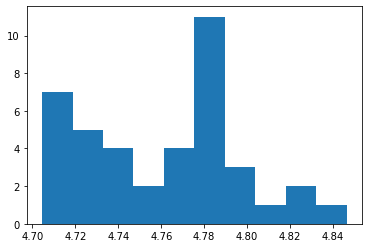

In [3]:
plt.hist(t)

In [4]:
stats.normaltest(t)

NormaltestResult(statistic=2.0133138435464057, pvalue=0.3654386296688394)

In [5]:
stats.shapiro(t)

ShapiroResult(statistic=0.9462890625, pvalue=0.05655645206570625)

Оба $pvalue > 0.05$, данные проходят тесты на нормальность

Среднее

In [6]:
np.mean(t)

4.760794

Стандартное отклонение

In [7]:
np.std(t, ddof=1)

0.038144469936928355

Стандартное отклонение среднего

In [8]:
np.std(t, ddof=1)/math.sqrt(len(t))

0.006031170257025644

Доверительный интервал

In [9]:
stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)

0.012199193266010573

Результаты
- Погрешность - $0.00$
- Среднее - $4.76$
- Интервал - $4.76 \pm 0.01$

`clock()` имеет точность измерения до мкс, округление до двух цифр после запятой